一维薛定谔方程：
$$i\hbar\frac{\partial\Psi}{\partial t} =-\frac{\hbar^2}{2m}\frac{\partial^2  \Psi}{\partial x^2} +V\Psi$$
因式分解，波函数分为空间部分和时间部分：
$$ \Psi (x,t) = \psi(x)f(t) $$
$$f(t)=e^{-iEt/\hbar}$$
$$ \frac{-\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} +V\psi=E\psi$$
有限差分方法(FDM)中用于近似二阶偏导数的三点模板
对 $\psi_{i+1}$,$\psi_{i-1}$ 进行泰勒展开
在有限差分方法中，我们常常使用泰勒展开的前几项来近似函数的导数
$$ \psi(x_{i+1})=\psi(x_i)+\psi'(x_i) \Delta x + \frac12\psi''(x_i)\Delta x^2 +O(\Delta x^3) $$
$$ \psi(x_{i-1})=\psi(x_i)-\psi'(x_i) \Delta x + \frac12\psi''(x_i)\Delta x^2 -O(\Delta x^3) $$
上面两式相加
$$ \psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})=\psi''(x_i)\Delta x^2+O(\Delta x^3) $$
$$ \psi''(x_i)=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{\Delta x^2}-\frac{O(\Delta x^3)}{\Delta x^2}=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{\Delta x^2}-O(\Delta x) $$
$$ \psi''(x_i)\approx \frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{\Delta x^2} $$
$\Delta x$越小，数据越精准
所以有:
$$ \frac{\partial^2 \psi_{i}}{\partial x^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2} $$ 
将上式代入薛定谔方程
$$ -\frac{\hbar^2}{2m}(\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2})+V_i\psi_i=E\psi_i $$
$$ -\frac{1}{2\Delta x^2}(\psi_{i-1} +(-2-(\frac{2m}{\hbar^2}\Delta x^2V_i))\psi_i+\psi_{i+1})=\frac{m}{\hbar^2}E\psi_i$$
$$ -\frac{1}{2\Delta x^2}\psi_{i-1}+\frac{1}{\Delta x^2}\psi_i +\frac{m}{\hbar^2} V_i\psi_i -\frac{1}{2\Delta x^2}\psi_{i+1}=\frac{m}{\hbar^2}E\psi_i $$
令$L=\frac{1}{\hbar^2}$
$$-\frac{1}{2\Delta x^2}\psi_{i-1}+\frac{1}{\Delta x^2}\psi_i +mL^2 V_i\psi_i -\frac{1}{2\Delta x^2}\psi_{i+1}=mL^2E\psi_i$$
写成矩阵形式，注意此处$\psi_0=0,\psi_N=0$
$$
\begin{bmatrix}
\frac{1}{\Delta x^2}+mL^2V_1 & -\frac{1}{2\Delta x^2} & 0 & \cdots & 0 \\
-\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2}+mL^2V_2&-\frac{1}{2\Delta x^2} &\cdots & 0\\
0 &-\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2}+mL^2V_3&\cdots &0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&0 &-\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2}+mL^2V_{N-1}\\
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
=mL^2E
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
$$
可知$$\hat H=\hat T +\hat V$$
所以动能算符
$$\hat T=
-\frac{1}{2\Delta x^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$
$$ \hat V=mL^2
\begin {bmatrix}
V_1&0&0&\cdots&0\\
0&V_2&0&\cdots&0\\
0&0&V_3&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&\cdots&\cdots&0&V_{N-1}\\
\end{bmatrix}
$$

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [77]:
# 设定N,dx,y
N=2000
dx=1.0/N
x=np.linspace(0,1,N+1)  #由于是\psi_0到\psi_N，所以是N+1个点
print(f'x坐标离散点分布为:{x}')
print(f'x坐标离散点个数为:{len(x)}')

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001


In [78]:
# def mL2V(x):
#     return 1000*(x-1/2)**2 
#无限深势阱是理想模型，此处通过足够深的有限势能模拟无限深势阱，使得波函数在边界处为0

# 高斯函数
def mL2V(x):
    return 1000*np.exp(-(x-0.7)**2/(2*0.05**2))

# 无限深势阱
# def mL2V(x):
#     return 0*x

V=mL2V(x)
print(f'势能V(x)分布为:{V}')
print(f'势能V(x)个数为:{len(V)}')

势能V(x)分布为:[2.74878501e-40 3.16169728e-40 3.63627206e-40 ... 1.71683202e-05
 1.61709405e-05 1.52299797e-05]
势能V(x)个数为:2001


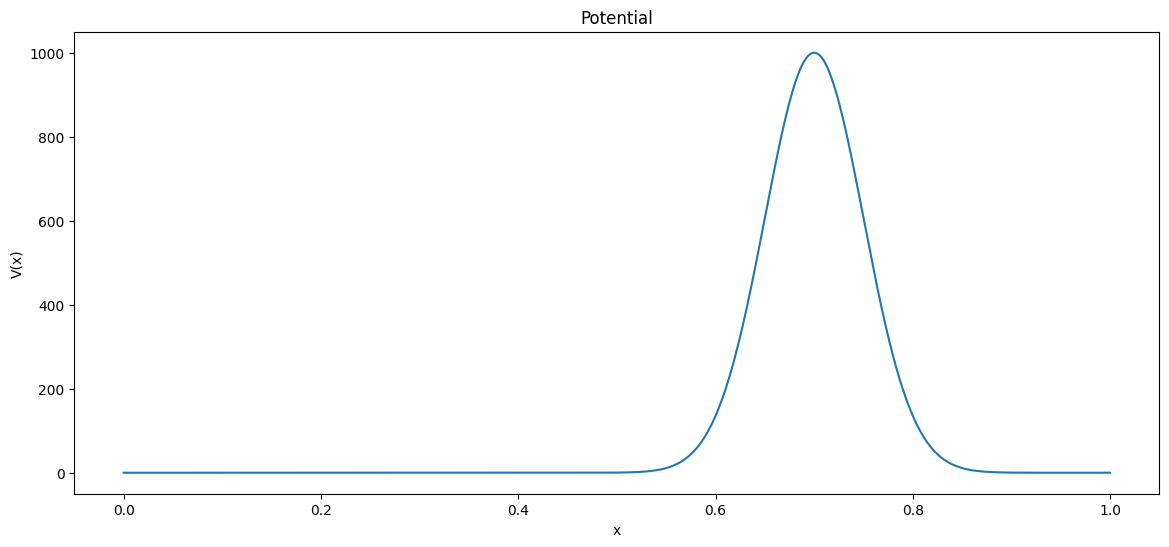

In [79]:
plt.figure(figsize=(14,6))
plt.plot(x,V)
plt.title('Potential')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

In [80]:
d=1/dx**2+mL2V(x)[1:-1]
e=-1/(2*dx**2)*np.ones(len(d)-1)

In [81]:
w,v=eigh_tridiagonal(d,e)
print(f'特征值w为:{w}')
print(f'特征函数v为:{v.T}')

特征值w为:[1.26179658e+01 5.01826883e+01 9.38941336e+01 ... 8.00000402e+06
 8.00025434e+06 8.00072153e+06]
特征函数v为:[[ 1.00343420e-04  2.00686206e-04  3.01027727e-04 ...  9.87111331e-08
   6.58077680e-08  3.29039878e-08]
 [-1.99257202e-04 -3.98509403e-04 -5.97751606e-04 ...  5.97366909e-07
   3.98252933e-07  1.99128965e-07]
 [ 8.56522783e-07  1.71300535e-06  2.56940750e-06 ...  1.33187187e-03
   8.87949317e-04  4.43985080e-04]
 ...
 [ 2.32173143e-05 -4.64346754e-05  6.96521298e-05 ...  2.90589216e-04
  -1.93725819e-04  9.68628120e-05]
 [-1.03035447e-09  2.06083998e-09 -3.09158756e-09 ...  2.55942217e-05
  -1.70610064e-05  8.52996084e-06]
 [ 4.39179725e-14 -8.78517891e-14  1.31817300e-13 ...  5.23615259e-07
  -3.48971929e-07  1.74454496e-07]]


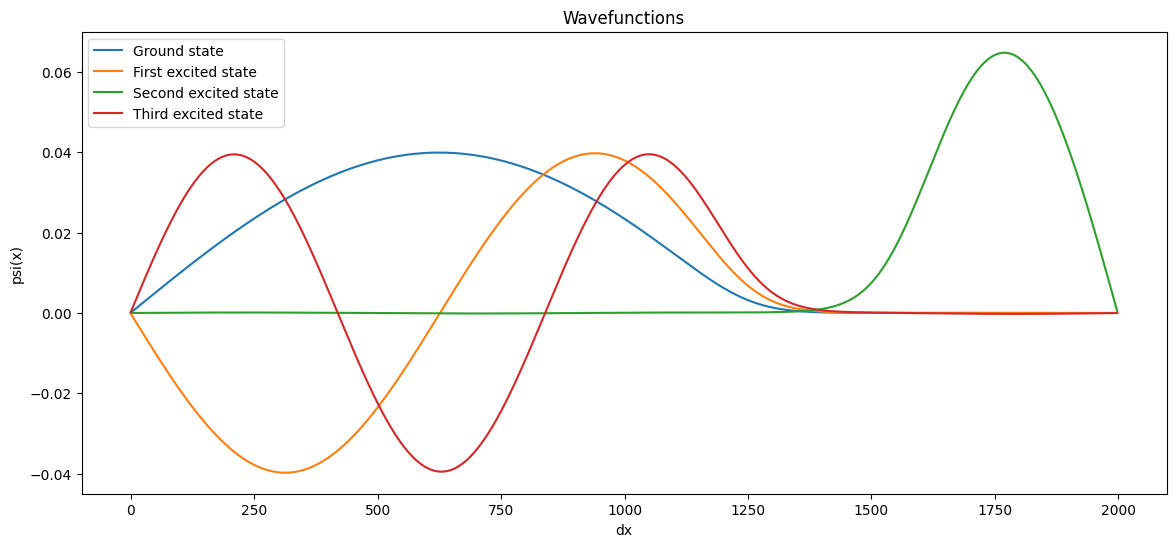

In [82]:
plt.figure(figsize=(14,6))
plt.plot(v.T[0],label='Ground state')
plt.plot(v.T[1],label='First excited state')
plt.plot(v.T[2],label='Second excited state')
plt.plot(v.T[3],label='Third excited state')
plt.title('Wavefunctions')
plt.xlabel('dx')
plt.ylabel('psi(x)')
plt.legend()
plt.show()

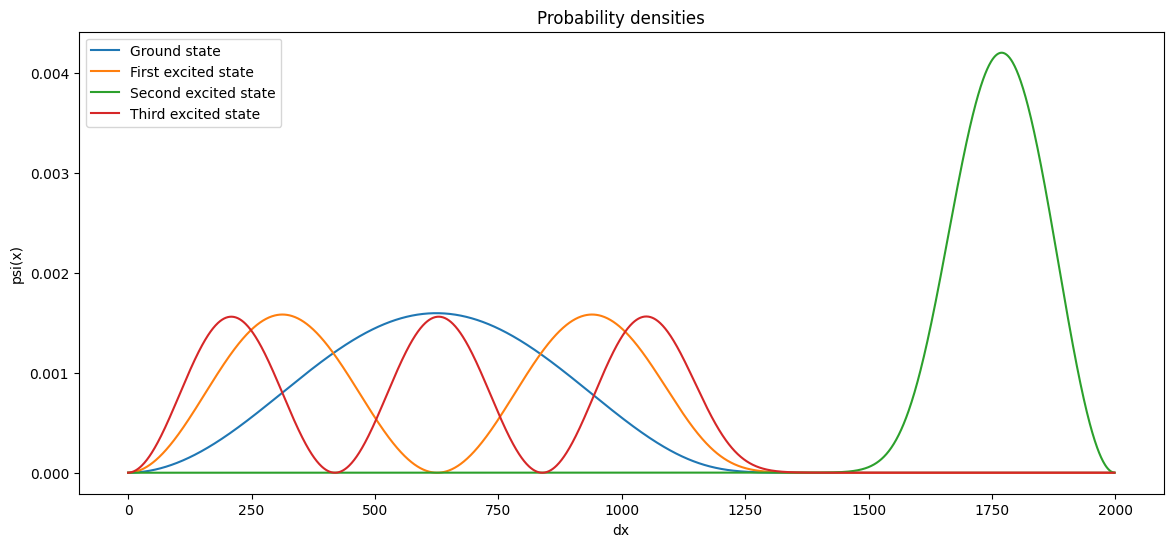

In [83]:
plt.figure(figsize=(14,6))
plt.plot(v.T[0]**2,label='Ground state')
plt.plot(v.T[1]**2,label='First excited state')
plt.plot(v.T[2]**2,label='Second excited state')
plt.plot(v.T[3]**2,label='Third excited state')
plt.title('Probability densities')
plt.xlabel('dx')
plt.ylabel('psi(x)')
plt.legend()
plt.show()

Text(0, 0.5, 'mL^2 E')

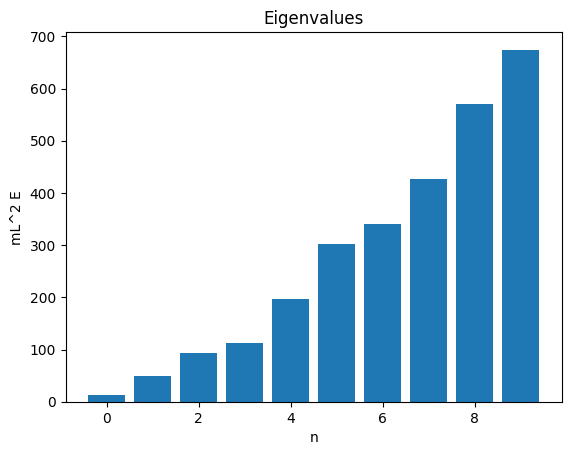

In [84]:
plt.bar(np.arange(0,10,1),w[0:10])
plt.title('Eigenvalues')
plt.xlabel('n')
plt.ylabel('mL^2 E')